## Observations and Insights

## Dependencies and starter code

In [1]:
#Magic function notebook
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
#pull only only pertinant data
tumor_vol = all_data[["Drug Regimen","Tumor Volume (mm3)"]]
#group data by regimen
drug_group = tumor_vol.groupby("Drug Regimen")

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean of tumor volume
drug_mean = drug_group.mean()
#median
drug_median = drug_group.median()
#variance
drug_variance = drug_group.var()
#standard deviation
drug_std = drug_group.std()
#SEM
drug_sem = drug_group.sem()

In [4]:
#merge first to tables to start df
sum_df = pd.merge(drug_mean, drug_median, on='Drug Regimen')
#rename columns to stop renaming issues later
sum_df = sum_df.rename(columns = {"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})
#add variance to df
sum_df = pd.merge(sum_df, drug_variance, on='Drug Regimen')
#add standard deviation to df
sum_df = pd.merge(sum_df, drug_std, on='Drug Regimen')
#add SEM to df
sum_df = pd.merge(sum_df, drug_sem, on='Drug Regimen')
#rename remaining columns
sum_df = sum_df.rename(columns = {"Tumor Volume (mm3)_x": "Variance", "Tumor Volume (mm3)_y": "Std Dev", "Tumor Volume (mm3)": "SEM"})
#print df
sum_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

<IPython.core.display.Javascript object>


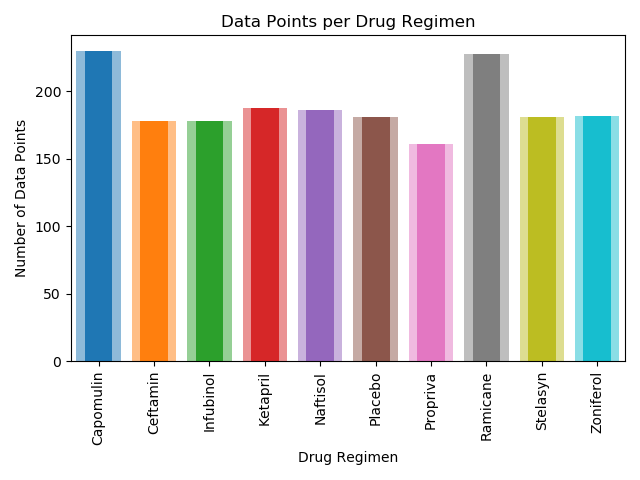

In [39]:
#Group data by drug regimen
drug_groups = all_data.groupby('Drug Regimen')
#Get a count of data points per drug regimen
group_counts = drug_groups['Drug Regimen'].count()
#
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#create the bar chart using pandas
points_panda = group_counts.plot(kind='bar', color=colors, title='Data Points per Drug Regimen')
#set the x and y labels
points_panda.set_xlabel('Drug Regimen')
points_panda.set_ylabel('Number of Data Points')

plt.tight_layout()
plt.show()
plt.savefig('points_panda.png')

In [40]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_groups2 = all_data.groupby('Drug Regimen')
group_counts2 = drug_groups2['Drug Regimen'].count()
x_axis = np.arange(len(drug_groups2))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
points_pplot = plt.bar(x_axis, group_counts2, color=colors, alpha=.5, align='center')

plt.tight_layout()
plt.show()
plt.savefig('points_pyplot.png')

## Pie plots

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mouse_group = all_data.groupby('Sex')
#group_count = mouse_group['Sex'].count()
#mouse_panda = group_counts.plot(kind='pie', title='Sex of Mice')
#plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen